## 01. 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지 알아보기 ##

### 1-1. mpg.csv 불러오기 ###

In [2]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


*→ 234개의 행과 11개의 열(변수)로 이루어진 데이터 생성*

### 1-2. 회사 집단별 평균표 만들기 ###

In [9]:
suv = mpg.query('category == "suv"')
suv

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv


*→ 차종이 suv인 행만 추출하여 데이터 만들기*

In [11]:
df_suv = suv.groupby('manufacturer', as_index=False) \
            .agg(mean_cty = ('cty', 'mean'))
df_suv

,manufacturer,mean_cty
0,chevrolet,12.666667
1,dodge,11.857143
2,ford,12.888889
3,jeep,13.500000
4,land rover,11.500000
5,lincoln,11.333333
6,mercury,13.250000
7,nissan,13.750000
8,subaru,18.833333
9,toyota,14.375000


### 1-3. 평균 막대그래프 만들기 ###

In [22]:
df_suv = df_suv.sort_values('mean_cty', ascending=False).head(5)
df_suv

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


*→ cty 평균이 높은 순서대로 정렬한 후 상위 5개 항목 저장하기*

<Axes: xlabel='manufacturer', ylabel='mean_cty'>

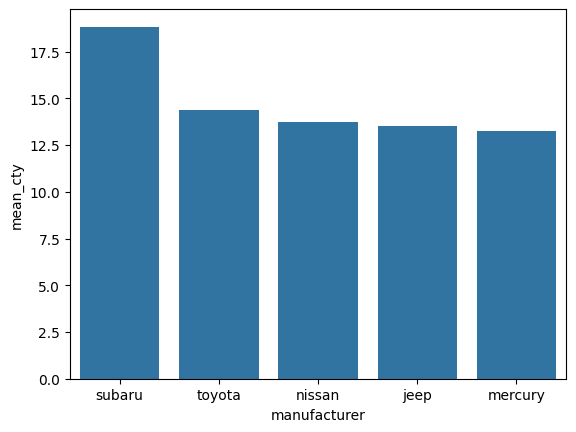

In [23]:
import seaborn as sns
sns.barplot(data = df_suv, x='manufacturer', y='mean_cty')

*→ suv 차종의 도시 연비가 가장 높은 회사는 ***subaru***이다.*

## 02. 자동차 중 어떤 category의 빈도가 많은지 알아보기 ##

### 2-1. category 집단별 빈도표 만들기 ###

In [18]:
df_category = mpg.groupby('category', as_index=False) \
                .agg(n = ('category', 'count'))
df_category

,category,n
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


### 2-2. 빈도 막대그래프 만들기 ###

In [25]:
df_category = df_category.sort_values('n', ascending=False)
df_category

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


*→ category 빈도가 높은 순서대로 데이터 정렬하기*

<Axes: xlabel='category', ylabel='n'>

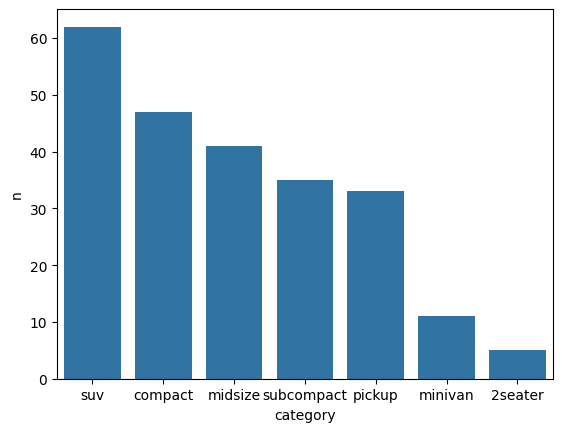

In [26]:
sns.barplot(data = df_category, x='category', y='n')

## 03. psavert가 시간(연도)에 따라 어떻게 변해 왔는지 알아보기 ##

### 3-1. economics.csv 불러오기 ###

In [27]:
economics = pd.read_csv('economics.csv')
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


### 3-2. 연도 변수 만들기 ###

In [28]:
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


*→ 시간 타입 변수 생성 후 .info()로 결과 확인*

In [30]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


*→ 시간 타입 변수에서 연도 추출 후 확인*

### 3-3. 연도별 시계열그래프 그리기 ###

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_31284\112116778.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x='year', y='psavert', ci=None)


<Axes: xlabel='year', ylabel='psavert'>

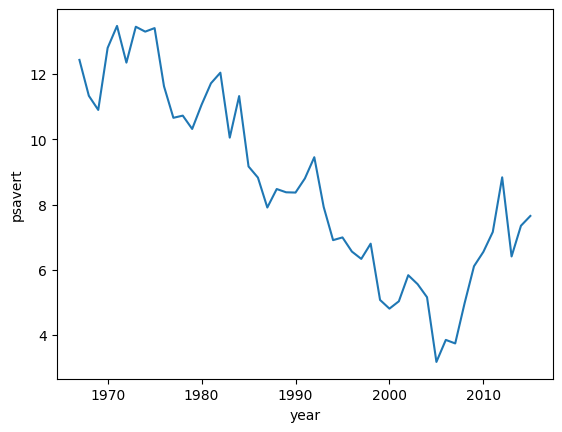

In [31]:
sns.lineplot(data = economics, x='year', y='psavert', ci=None)

*→ 시계열그래프 확인 결과, **개인 저축률은 2000년대까지 감소하는 양상을 보이다가 2010년대에 이르러 다시 우상향** 하고 있다.*

## 04. 2014년 월별 psavert 시계열그래프 만들기 ##

### 4-1. 연도가 2014년인 행만 추출하여 데이터 만들기 ###

In [32]:
year2014 = economics.query('year == 2014')
year2014

,date,pce,pop,psavert,uempmed,unemploy,date2,year
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014
563,2014-06-01,11817.0,318464.152,7.4,13.8,9460,2014-06-01,2014
564,2014-07-01,11860.5,318662.368,7.5,13.1,9608,2014-07-01,2014
565,2014-08-01,11944.3,318893.786,7.2,12.9,9599,2014-08-01,2014
566,2014-09-01,11957.4,319125.296,7.4,13.4,9262,2014-09-01,2014
567,2014-10-01,12023.0,319353.734,7.2,13.6,8990,2014-10-01,2014


### 4-2. 월 변수 만들기 ###

In [33]:
year2014['month'] = year2014['date2'].dt.month
year2014.head()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_31284\2602429130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2014['month'] = year2014['date2'].dt.month


,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014,1
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014,2
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014,3
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014,4
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014,5


*→ year2014의 날짜 시간 타입 변수에서 월 추출하기*

### 4-3. 2014년 월별 psavert 시계열그래프 만들기 ###

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_31284\118904.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = year2014, x='month', y='psavert', ci=None)


<Axes: xlabel='month', ylabel='psavert'>

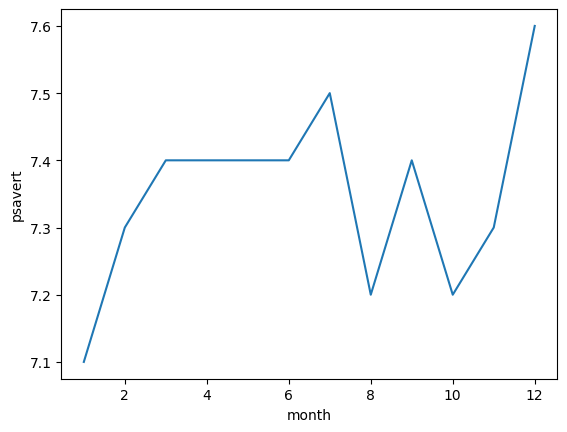

In [34]:
sns.lineplot(data = year2014, x='month', y='psavert', ci=None)